In [ ]:
import pandas as pd

global_news_data_whole = pd.read_csv("C:\Shivangi\college\Sem 4\MLPR\project/news-more-context\global news data set/rating.csv")
# drop the columns that are not required
global_news_data_whole = global_news_data_whole[['article_id', 'source_id', 'source_name', 'title','published_at', 'category', 'article', 'title_sentiment']]
# create a smaller dataset with 10000 random samples
global_news_data = global_news_data_whole.sample(n=20000)

In [ ]:
# split global news into training and testing data. use sklearn.model_selection.train_test_split
from sklearn.model_selection import train_test_split
train, test = train_test_split(global_news_data, test_size=0.2)
print(train.shape)
# build a co training classifier
from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

# create a pipeline
model = make_pipeline(TfidfVectorizer(), LabelSpreading())
model.fit(train['article'], train['title_sentiment'])
# predict the sentiment of the test data
predicted_sentiment = model.predict(test['article'])
print("predicted sentiment: ", predicted_sentiment.shape)
# calculate the accuracy of the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(test['title_sentiment'], predicted_sentiment))
print(confusion_matrix(test['title_sentiment'], predicted_sentiment))
print(classification_report(test['title_sentiment'], predicted_sentiment))

In [ ]:
# split global news into training and testing data. use sklearn.model_selection.train_test_split
from sklearn.model_selection import train_test_split
train, test = train_test_split(global_news_data, test_size=0.2)
print(train.shape)
# build a co training classifier using SVM and Naive Bayes
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# create a pipeline for Naive Bayes
model1 = make_pipeline(TfidfVectorizer(), MultinomialNB())
# create a pipeline for SVM
model2 = make_pipeline(TfidfVectorizer(), SVC())

# train the models
model1.fit(train['article'], train['title_sentiment'])
model2.fit(train['article'], train['title_sentiment'])

# predict the test data
pred1 = model1.predict(test['article'])
pred2 = model2.predict(test['article'])

# print the accuracy of the models
print("Accuracy of Naive Bayes: ", accuracy_score(test['title_sentiment'], pred1))
print("Accuracy of SVM: ", accuracy_score(test['title_sentiment'], pred2))

# print the classification report
print("Classification report of Naive Bayes: ", classification_report(test['title_sentiment'], pred1))
print("Classification report of SVM: ", classification_report(test['title_sentiment'], pred2))

# print the confusion matrix
print("Confusion matrix of Naive Bayes: ", confusion_matrix(test['title_sentiment'], pred1))
print("Confusion matrix of SVM: ", confusion_matrix(test['title_sentiment'], pred2))

# cross validation
print("Cross validation of Naive Bayes: ", cross_val_score(model1, test['article'], test['title_sentiment'], cv=10))
print("Cross validation of SVM: ", cross_val_score(model2, test['article'], test['title_sentiment'], cv=10))



In [2]:
import pandas as pd
from translate import Translator

# Sample DataFrame creation
data = {
    'title': ['Happy day in the sunshine', 'Great success in the project', 'Loving the new updates'],
    'title_sentiment': ['Positive', 'Positive', 'Positive']
}

df = pd.DataFrame(data)

# Filter rows where sentiment is Positive
df_positive = df[df['title_sentiment'] == 'Positive']

# Define the translator function for back-translation
def back_translate(series, to_lang='de', from_lang='en'):
    # Initialize translators
    translator_to = Translator(to_lang=to_lang, from_lang=from_lang)
    translator_back = Translator(to_lang=from_lang, from_lang=to_lang)

    back_translated_series = series.apply(lambda x: translator_back.translate(translator_to.translate(x)))
    return back_translated_series

# Apply back translation
df_positive['back_translated_title'] = back_translate(df_positive['title'])

print(df_positive[['title', 'back_translated_title']])

                          title         back_translated_title
0     Happy day in the sunshine          Happy day in the sun
1  Great success in the project  Great success in the project
2        Loving the new updates        I love the new updates


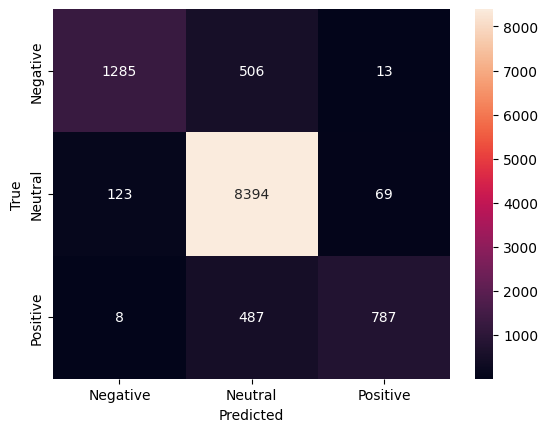

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

ConfusionMatrix = [[1285,  506 ,  13], [ 123, 8394  , 69], [   8 , 487,  787]]
sns.heatmap(ConfusionMatrix, annot=True, cmap='rocket', fmt='g') 
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks([0.5, 1.5, 2.5], ['Negative', 'Neutral', 'Positive'])
plt.yticks([0.5, 1.5, 2.5], ['Negative', 'Neutral', 'Positive'])
plt.show()